In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel(r'DistanciasCiudades.xlsx', engine='openpyxl')
tab_conf= df.to_numpy()[0:18]

In [124]:
#Generacion de la población
class Poblacion:
    def __init__(self, num_pob, num_gen, dataf):
        self.num_pob= num_pob
        self.num_gen= num_gen
        self.tabla= dataf
        self.CreacionPoblacion()
        self.AcomodoPob()

    def CreacionPoblacion(self):
        self.pobl= np.empty(self.num_pob, dtype= object)
        for f in range(self.num_pob):
            self.pobl[f]= Individuo(self.num_gen, self.tabla)

    def AcomodoPob(self):
        for n in range(self.num_pob):
            for m in range(self.num_pob-1):
                if self.pobl[m].apt > self.pobl[m+1].apt:
                    tmp= self.pobl[m]
                    self.pobl[m]= self.pobl[m+1]
                    self.pobl[m+1]= tmp
    
    def CruzaSelecT(self, gen1, gen2):
        nuevgen= np.empty([self.num_pob, self.num_gen], dtype= int)
        for f in range(int(self.num_pob/2)):
            padre= self.pobl[f].indv
            madre= self.pobl[self.num_pob-f-1].indv
            relac= np.zeros([2, gen2-gen1])
            relac[0, :]= padre[gen1:gen2]
            relac[1, :]= madre[gen1:gen2]
            padre[gen1:gen2]= relac[1, :]
            madre[gen1:gen2]= relac[0, :]
            for r in range(gen2-gen1):
                for c in range(gen2-gen1):
                    for t in range(len(madre)):
                        if (relac[1, c]== padre[t]) and (t <= gen1 or t> gen2):
                            padre[t]= relac[0, c]
                        if (relac[0, c]== madre[t]) and (t <= gen1 or t> gen2):
                            madre[t]= relac[1, c]
            nuevgen[f*2,:]= padre
            nuevgen[(f*2)+1,:]= madre
        return nuevgen
    
    def ImprimirPob(self):
        for t in self.pobl:
            print(t.indv)

    def ActualizacionPobl(self, nuevgeneracion):
        for a,b in zip(range(self.num_pob), nuevgeneracion):
            self.pobl[a].ActualizacionGen(b)
        self.AcomodoPob()




#---------------------------------------------------------------

class Individuo:
    def __init__(self, num_gen, tab, nuev= 0):
        self.num_gen= num_gen
        self.tabla= tab
        self.nuev= nuev
        self.CreacionIndividuo()
        self.Aptitud()
        
    def CreacionIndividuo(self):
        prueb= np.arange(self.num_gen, dtype= int)
        for c in range(self.num_gen, 0, -1):
            cam= np.random.randint(c)
            guard= prueb[c-1]
            prueb[c-1]= prueb[cam]
            prueb[cam]= guard
        self.indv= prueb

    def Aptitud(self):
        distancia= 0
        for c in range(self.num_gen-1):
            distancia= distancia+ self.tabla[self.indv[c], self.indv[c+1]]
        distancia= distancia+ self.tabla[self.indv[1], self.indv[c+1]]
        self.apt= distancia
    
    def ActualizacionGen(self, gen):
        self.indv= gen
        self.Aptitud()

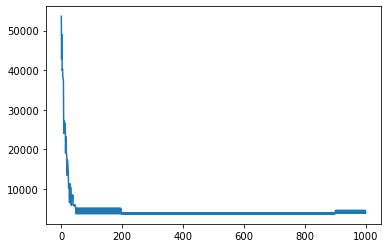

In [131]:
n= Poblacion(50, 18, tab_conf)

epoch= 1000
mejor= np.zeros(epoch, dtype= int)
for t in range(epoch):
    ngen= n.CruzaSelecT(7, 11)
    n.ActualizacionPobl(ngen)
    mejor[t]= n.pobl[0].apt

plt.plot(mejor)

In [67]:
c= Seleccion(n.pobl, n.num_pob, n.num_gen, 7, 11)

In [77]:
print(n.pobl[:].inv)

AttributeError: 'numpy.ndarray' object has no attribute 'inv'

In [74]:
for g in n.pobl:
    print(g.indv)

[ 1  3 13  7  8 16 15 12  5 10 17  4  9 14  0 11  2  6]
[15 10  7  8 17  1 16 12  5  0 11  2  3 14  6 13  4  9]
[13  6 10 15 16  1  2 12  4  5  0 11  9 17  3  8 14  7]
[ 5  1 13 17  4  6 10  7 16 12 15 14  9  3  8 11  0  2]
[15 16  2 13  4  8 10  6 11  5  9  0  7 14 17  3  1 12]
[17  9  0 15  4  7 13 11  8  2  3  5  1 12 10 14  6 16]
[13 14 12  4 16 11 15  0 10  2  9  6  1  7  5  8 17  3]
[16 10  6  5 14  4  0 17 13  3  8  7 11  2  9 15  1 12]
[12 16 11  3  6 14  7  4 15 10  5  0  2 13 17  8  1  9]
[ 8 16 12  5 13  1 10  9  3 17  4  2 11  6  0  7 14 15]
[14 11  6  7 15  4  3 10  8  0 13  9  5 16 12 17  2  1]
[ 7 11  5 14  6  9  8  1  4 13 10 16 12  3 17  0 15  2]
[12 15 17  6  9  1 16  3  7  2  5  8 14 11  4 10 13  0]
[14  4  1  0  6 15 12 17  8  2 10  3 13  7 11  5 16  9]
[13  8  1  9  6  7 12  2  3 11  5 14 17  0  4 15 16 10]
[15  2  6 16 10  3 12  9  0 14  8  1  4  5 17  7 11 13]
[ 2  4 10  7 14  9 13 11 15  5  0  6  8  3 12  1 16 17]
[17 15  5 16  4 10  7  8 11  3  9 14  0  1 12  2